<img src="https://5264302.fs1.hubspotusercontent-na1.net/hubfs/5264302/Demo%20Asset%20Resources/Demo%20Covers/CM-Demo-market_cap_metrics-Cover.png" width=1100 margin-left='auto' margin-right='auto'/>

This notebook demonstrates basic functionality offered by the Coin Metrics Python API Client and Network Data Pro.

Coin Metrics offers a vast assortment of data for hundreds of cryptoassets. The Python API Client allows for easy access to this data using Python without needing to create your own wrappers using `requests` and other such libraries.

## Resources
To understand the data that Coin Metrics offers, feel free to peruse the resources below.

- The [Coin Metrics API v4](https://docs.coinmetrics.io/api/v4) website contains the full set of endpoints and data offered by Coin Metrics.
- The [Coin Metrics Knowledge Base](https://docs.coinmetrics.io/info) gives detailed, conceptual explanations of the data that Coin Metrics offers.
- The [API Spec](https://coinmetrics.github.io/api-client-python/site/api_client.html) contains a full list of functions.

## Setup

In [1]:
from os import environ
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import logging
from datetime import date, datetime, timedelta
from coinmetrics.api_client import CoinMetricsClient
import json
import logging
import matplotlib.ticker as mticker
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S'
)

In [36]:
end_time = datetime.today().date()
start_time = end_time - timedelta(days=90)

In [3]:
# We recommend privately storing your API key in your local environment.
try:
    api_key = environ["CM_API_KEY"]
    logging.info("Using API key found in environment")
except KeyError:
    api_key = ""
    logging.info("API key not found. Using community client")


client = CoinMetricsClient(api_key)

2024-09-16 15:00:54 INFO     Using API key found in environment


# Market Cap Based on Verified On-Chain Supply


In order to trustlessly verify market capitalization, Coin Metrics directly indexes the blockchain to independently validate the amount of circulating supply.

The **CapMrktCurUSD** metric offers the most reliable measure of asset supply, with the trade-off of slightly limited asset coverage.

In [10]:
df_reference_capmkrtcur = client.reference_data_asset_metrics(metrics='CapMrktCurUSD').to_dataframe()

In [11]:
df_reference_capmkrtcur

,metric,full_name,description,product,category,subcategory,unit,data_type,type
0,CapMrktCurUSD,"Capitalization, market, current supply, USD",The sum USD value of the current supply. Also ...,Network Data,Market,Market Capitalization,USD,decimal,Product


In [18]:
list_capmrktcur_assets = [a['asset'] for a in client.catalog_asset_metrics_v2(metrics='CapMrktCurUSD')]

In [20]:
print(f"Number of assets with Market Cap: {len(list_capmrktcur_assets)}")

Number of assets with Market Cap: 153


In [37]:
capmrktcur = client.get_asset_metrics(
    assets=list_capmrktcur_assets,
    metrics='CapMrktCurUSD',
    start_time=start_time,
    end_time=end_time,
    page_size=1000
).to_dataframe()

In [38]:
capmrktcur.head()

,asset,time,CapMrktCurUSD
0,1inch,2024-06-18 00:00:00+00:00,601806926.332868
1,1inch,2024-06-19 00:00:00+00:00,669292018.418909
2,1inch,2024-06-20 00:00:00+00:00,638964090.844949
3,1inch,2024-06-21 00:00:00+00:00,602574091.306198
4,1inch,2024-06-22 00:00:00+00:00,614578628.290457


In [39]:
capmrktcur_pivot = capmrktcur.pivot(index='time',columns='asset',values='CapMrktCurUSD')

In [40]:
capmrktcur_pivot['Total Cap'] = capmrktcur_pivot.sum(axis=1)

In [41]:
capmrktcur_pivot

asset,1inch,aave,ada,ae_eth,algo,alpha,ant,avaxc,avaxp,avaxx,...,xem,xlm,xmr,xrp,xvg,yfi,zec,zil_eth,zrx,Total Cap
time,,,,,,,,,,,,,,,,,,,,,
2024-06-18 00:00:00+00:00,601806926.332868,1306437999.295638,13424730961.241064,8832610.158148,1339360258.68476,80619082.899196,352010549.615121,2388322499.746325,12838611730.911514,713309094.675862,...,126980953.174033,9610695086.9286,3054203115.691232,49052418232.612778,6724446390.59112,212203308.017145,311270858.886043,2305684.889749,336195840.86146,2.229542e+12
2024-06-19 00:00:00+00:00,669292018.418909,1400637382.569757,13423644078.574947,9099450.288229,1382363720.84246,81094309.783218,356082846.868479,2414215130.39066,12984873845.978542,721319158.751801,...,126674840.822162,9820585062.035196,3020726381.652565,49268483622.64537,6829094885.807176,217383791.66592,303049562.236562,2343771.624651,353937035.765548,2.237127e+12
2024-06-20 00:00:00+00:00,638964090.844949,1358825403.114587,13453912813.410269,9227041.800181,1383256522.94337,84522774.743021,350618174.842791,2471190230.800348,13321331442.85092,739621942.386422,...,132373773.581515,9896582194.97669,3046146822.064857,48866370533.68499,6940480158.50313,216572442.484699,303519008.658101,2350164.716928,360417663.325525,2.231134e+12
2024-06-21 00:00:00+00:00,602574091.306198,1310711198.734895,13174182377.372046,9316984.240167,1391489499.4855,82641066.611264,353348338.081292,2456046637.217133,13261561451.744013,738741018.612855,...,129064560.654881,9697203679.229527,2863904454.917198,48889782361.155952,6827462838.701295,213908822.241556,304438515.678476,2329727.25247,359650229.244396,2.214003e+12
2024-06-22 00:00:00+00:00,614578628.290457,1303628383.546602,13475267480.649416,9080680.725316,1339705315.54913,81442254.171929,351060582.670069,2342337218.532271,12381600154.273886,639220357.617559,...,129465576.97741,9581669381.902111,2995259845.285223,48655540991.974068,7013277883.554922,214667247.899236,304854610.414748,2373452.370937,359377609.401009,2.213118e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-11 00:00:00+00:00,370795675.998745,2394157493.994128,<NA>,7086282.571463,1272138738.08548,55696931.758843,236080888.610476,2381194755.211256,11102231898.578779,561574500.581236,...,150087591.429489,9790016731.104605,3120199983.171181,53527147783.98262,6095473842.098846,178156431.46414,459255827.96882,1810381.365383,277605159.385683,1.915254e+12
2024-09-12 00:00:00+00:00,384232522.92621,2327005794.360288,<NA>,7371122.985217,1299855257.21774,57785093.830921,236071341.779449,2452806790.290408,11431048630.015509,578191291.778559,...,154361726.733294,9997934147.338022,3105706133.057552,56215867452.010078,6267860632.323607,178663216.244342,454920192.594087,1848757.475975,287032283.247654,1.939759e+12
2024-09-13 00:00:00+00:00,400557336.250521,2311665536.23392,<NA>,7832592.091806,1330044901.28941,58858736.968168,240512223.869399,2545118411.801699,11866069991.509184,600182210.371027,...,157141907.013232,10153491708.845804,3064948299.210351,57221528978.257057,6405467690.943713,179478034.544076,473244206.395726,1885345.54056,297832199.512269,2.004984e+12


In [42]:
current_market_cap_last = capmrktcur_pivot['Total Cap'][-1]

formatted_market_cap = '${:,.2f}'.format(current_market_cap_last)

print('Current Market Cap based on verified on-chain supply: ' + formatted_market_cap)

Current Market Cap based on verified on-chain supply: $1,950,918,193,666.17


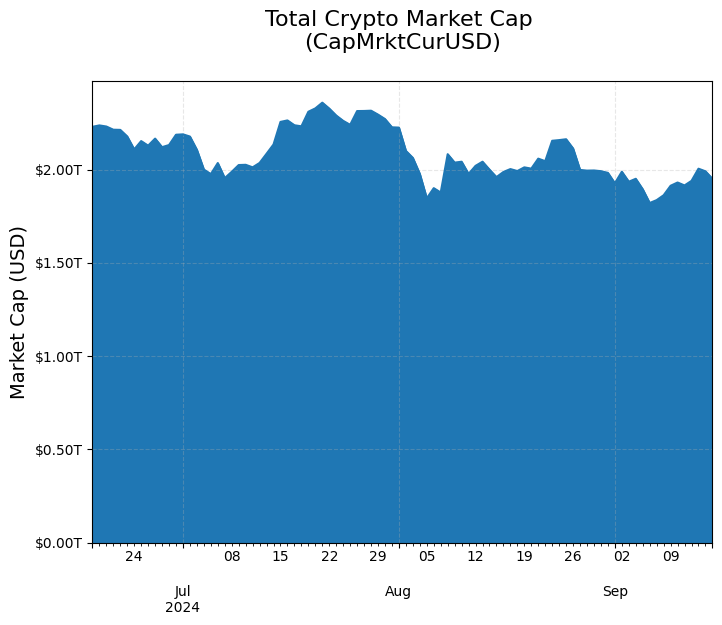

In [70]:
plt.figure(figsize=(8, 6))
capmrktcur_pivot['Total Cap'].plot(kind='area', stacked=True)

# Set the title and labels
plt.title('Total Crypto Market Cap \n(CapMrktCurUSD)\n',fontsize=16)
plt.xlabel('') 
plt.ylabel('Market Cap (USD)',fontsize=14)
plt.grid(True, alpha=0.3, linestyle='--')
formatter = mticker.FuncFormatter(lambda x, pos: '${:,.2f}T'.format(x/1000000000000))
plt.gca().yaxis.set_major_formatter(formatter)

plt.savefig("ndp_capmrktcurusd.png");

![CapMrktCurUSD](ndp_capmrktcurusd.png)

# Estimated Market Cap

Due to the complexity of running blockchain nodes, some assets pose additional challenges in directly verifying supply data. Coin Metrics partners with CoinGecko to offer a "estimated supply" metric, sourced from a variety of third-party sources like token projects or blockchain explorers.

The **CapMrktEstUSD** metric offers slightly wider asset coverage, with the trade-off of leveraging more "trusted" sources for supply.

In [44]:
df_reference_capmrktest = client.reference_data_asset_metrics(metrics='CapMrktEstUSD').to_dataframe()

In [45]:
df_reference_capmrktest

,metric,full_name,description,product,category,subcategory,unit,data_type,type
0,CapMrktEstUSD,"Capitalization, market, estimated supply, USD",The sum USD value of the estimated supply in c...,Network Data,Market,Market Capitalization,USD,decimal,Product


In [46]:
list_capmrktest_assets = [a['asset'] for a in client.catalog_asset_metrics_v2(metrics='CapMrktEstUSD')]

In [49]:
capmrktest = client.get_asset_metrics(
    assets=list_capmrktest_assets,
    metrics='CapMrktEstUSD',
    start_time=start_time,
    end_time=end_time,
    page_size=10000
).to_dataframe()

In [50]:
capmrktest_pivot = capmrktest.pivot(index='time',columns='asset',values='CapMrktEstUSD')

In [51]:
capmrktest_pivot['Total Cap'] = capmrktest_pivot.sum(axis=1)

In [52]:
est_market_cap_last = capmrktest_pivot['Total Cap'][-1]

formatted_est_market_cap = '${:,.2f}'.format(est_market_cap_last)

print('Estimated Market Cap based on estimated supply (3rd-party sources): ' + formatted_est_market_cap)

Estimated Market Cap based on estimated supply (3rd-party sources): $2,084,782,376,216.38


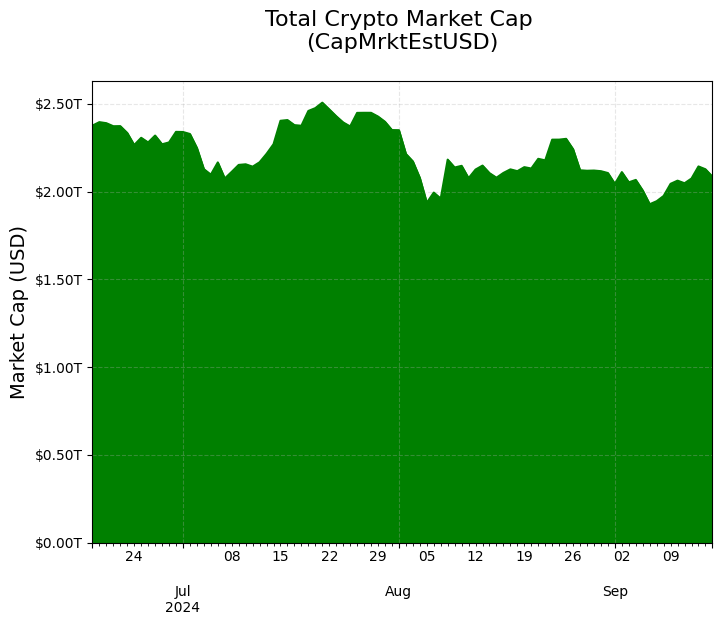

In [54]:
plt.figure(figsize=(8, 6))

capmrktest_pivot['Total Cap'].plot(kind='area', stacked=True, color='green')
plt.title('Total Crypto Market Cap \n(CapMrktEstUSD)\n',fontsize=16)
plt.xlabel('') 
plt.ylabel('Market Cap (USD)',fontsize=14)
plt.grid(True, alpha=0.3, linestyle='--')

formatter = mticker.FuncFormatter(lambda x, pos: '${:,.2f}T'.format(x/1000000000000))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

# Free Float Market Cap

While traditional market capitalization metrics rely on circulating supply to quantify the aggregate value of an asset, circulating supply may not necessarily be the appropriate metric for measuring the liquid, readily-available count of units available on the markert.

Free Float Market Capitalization, or **CapMrktFFUSD**, is a measure of the market value of an asset’s supply that is issued and available to market participants. This excludes supply that is held by insiders (i.e. protocol treasuries), controlling investors, and long term strategic holders (units with 5+ years of inactivity).

In [55]:
df_reference_capmrktffusd = client.reference_data_asset_metrics(metrics='CapMrktFFUSD').to_dataframe()

In [56]:
df_reference_capmrktffusd

,metric,full_name,description,product,category,subcategory,unit,data_type,type
0,CapMrktFFUSD,"Capitalization, market, free float, USD",The sum USD value of the current free float su...,Network Data,Market,Market Capitalization,USD,decimal,Product


In [58]:
catalog_ff = client.catalog_asset_metrics_v2(metrics='CapMrktFFUSD').to_list()

In [60]:
catalog_ff[:5]

[{'asset': '1inch',
  'metrics': [{'metric': 'CapMrktFFUSD',
    'frequencies': [{'frequency': '1d',
      'min_time': '2020-12-26T00:00:00.000000000Z',
      'max_time': '2024-09-15T00:00:00.000000000Z',
      'community': True}]}]},
 {'asset': 'aave',
  'metrics': [{'metric': 'CapMrktFFUSD',
    'frequencies': [{'frequency': '1d',
      'min_time': '2020-10-10T00:00:00.000000000Z',
      'max_time': '2024-09-15T00:00:00.000000000Z',
      'community': True}]}]},
 {'asset': 'ada',
  'metrics': [{'metric': 'CapMrktFFUSD',
    'frequencies': [{'frequency': '1d',
      'min_time': '2017-12-01T00:00:00.000000000Z',
      'max_time': '2024-09-08T00:00:00.000000000Z',
      'community': True}]}]},
 {'asset': 'aion_eth',
  'metrics': [{'metric': 'CapMrktFFUSD',
    'frequencies': [{'frequency': '1d',
      'min_time': '2017-12-22T00:00:00.000000000Z',
      'max_time': '2023-03-03T00:00:00.000000000Z',
      'community': True}]}]},
 {'asset': 'algo',
  'metrics': [{'metric': 'CapMrktFFUSD',


### Comparing BTC market capitalization with BTC free float market capitalization

In [61]:
btc_ff_and_cur = client.get_asset_metrics(
    assets='btc',
    metrics=['CapMrktFFUSD','CapMrktCurUSD'],
    start_time=start_time,
    end_time=end_time
).to_dataframe()

In [62]:
btc_ff_and_cur

,asset,time,CapMrktCurUSD,CapMrktFFUSD
0,btc,2024-06-18 00:00:00+00:00,1283620750458.029053,892930547450.634399
1,btc,2024-06-19 00:00:00+00:00,1279047103315.121094,889718923157.247559
2,btc,2024-06-20 00:00:00+00:00,1279448394407.814453,889934057173.784424
3,btc,2024-06-21 00:00:00+00:00,1263474830674.393311,878772804275.674194
4,btc,2024-06-22 00:00:00+00:00,1266898089628.073975,881035407234.292114
...,...,...,...,...
85,btc,2024-09-11 00:00:00+00:00,1133986205007.474609,785339554938.315308
86,btc,2024-09-12 00:00:00+00:00,1148145814023.138916,795139187847.963867
87,btc,2024-09-13 00:00:00+00:00,1195818457804.406494,828180803304.224121
88,btc,2024-09-14 00:00:00+00:00,1185380845498.997314,820893975766.963257


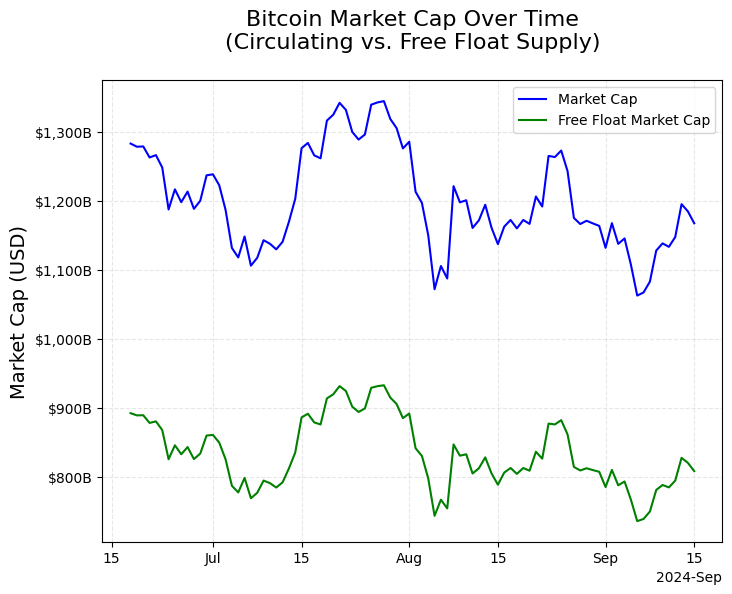

In [64]:
plt.figure(figsize=(8, 6))

plt.plot(btc_ff_and_cur['time'], btc_ff_and_cur['CapMrktCurUSD'] / 1e9, label='Market Cap', color='blue')
plt.plot(btc_ff_and_cur['time'], btc_ff_and_cur['CapMrktFFUSD'] / 1e9, label='Free Float Market Cap', color='green')

plt.title('Bitcoin Market Cap Over Time\n(Circulating vs. Free Float Supply)\n', fontsize=16)
plt.xlabel('')
plt.ylabel('Market Cap (USD)', fontsize=14)
plt.grid(True, alpha=0.3, linestyle='--')

formatter = mticker.FuncFormatter(lambda x, pos: '${:,.0f}B'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

plt.legend()

plt.show()